In [10]:
# для класса HOG

In [6]:
import cv2
from ultralytics import YOLO
import random

# Имена классов из вашего датасета
class_names = ['Coyote', 'Deer', 'Hog', 'Rabbit', 'Raccoon']
hog_class_index = class_names.index('Hog')

def process_video_with_tracking(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.mp4", window_size=(640, 480)):
    # Открыть входной видеофайл
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Получить частоту кадров и размеры входного видео
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Определить видеозаписывающее устройство для выходного видео
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        results = model.predict(frame, iou=0.4, conf=0.5, imgsz=608, verbose=False)

        if results[0].boxes is not None:  # Проверка, что есть боксы
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            classes = results[0].boxes.cls.cpu().numpy().astype(int)  # Классы объектов

            for box, cls in zip(boxes, classes):
                if cls == hog_class_index:  # Проверяем, что это класс "Hog"
                    # Сгенерировать случайный цвет для каждого класса
                    random.seed(str(cls))
                    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

                    cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), color, 2)
                    label = class_names[cls]  # Подпишем объект именем класса
                    cv2.putText(
                        frame,
                        label,
                        (box[0], box[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        3.0,  # Увеличим размер шрифта
                        (0, 255, 255),
                        2,
                    )
        
        if save_video:
            out.write(frame)

        if show_video:
            frame_resized = cv2.resize(frame, window_size)  # Изменим размер до фиксированного окна
            cv2.imshow("frame", frame_resized)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    # Освободить входное видео и видеозаписывающее устройство
    cap.release()
    if save_video:
        out.release()

    # Закрыть все окна OpenCV
    cv2.destroyAllWindows()

# Пример использования:
model = YOLO('runs/detect/train/weights/best.pt')
model.fuse()
process_video_with_tracking(model, "valid.mp4", show_video=True, save_video=False, output_video_path="output_video.mp4", window_size=(800, 600))


YOLOv10m summary (fused): 369 layers, 16,456,174 parameters, 0 gradients, 63.4 GFLOPs


YOLOv10m summary (fused): 369 layers, 16,456,174 parameters, 0 gradients, 63.4 GFLOPs

image 1/1 /home/user/Desktop/OBJECT_DETECT_AND_LLM/AI_Detect/Coyote.png: 320x640 2 Coyotes, 100.4ms
Speed: 1.2ms preprocess, 100.4ms inference, 0.2ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /home/user/Desktop/OBJECT_DETECT_AND_LLM/AI_Detect/kaban.png: 320x640 6 Hogs, 127.2ms
Speed: 1.2ms preprocess, 127.2ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 640)


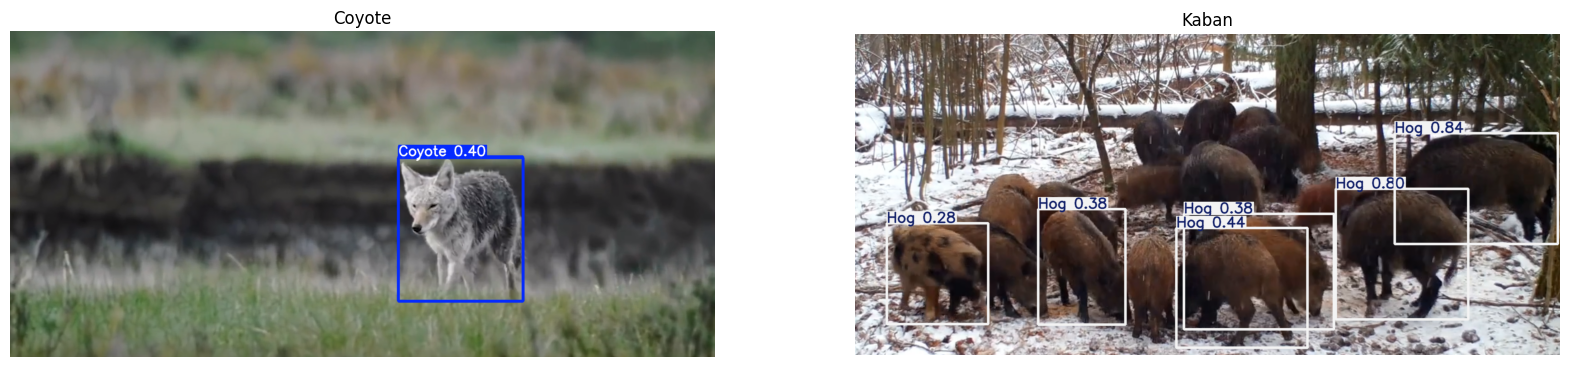

In [11]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Загрузка обученной модели YOLO
model = YOLO('runs/detect/train/weights/best.pt')
model.fuse()

# Выполнение предсказаний на изображениях
results_coyote = model("Coyote.png")
results_kaban = model("kaban.png")

# Получение изображений с предсказаниями
img_with_predictions_coyote = results_coyote[0].plot()  # .plot() возвращает изображение с предсказаниями
img_with_predictions_kaban = results_kaban[0].plot()

# Отображение изображений в Jupyter Notebook
plt.figure(figsize=(20, 10))

# Первая картинка
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_with_predictions_coyote, cv2.COLOR_BGR2RGB))  # Преобразование цвета для правильного отображения
plt.title("Coyote")
plt.axis('off')  # Отключить оси

# Вторая картинка
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_predictions_kaban, cv2.COLOR_BGR2RGB))  # Преобразование цвета для правильного отображения
plt.title("Kaban")
plt.axis('off')  # Отключить оси

plt.show()